In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
import pylab
import matplotlib.pyplot as plt

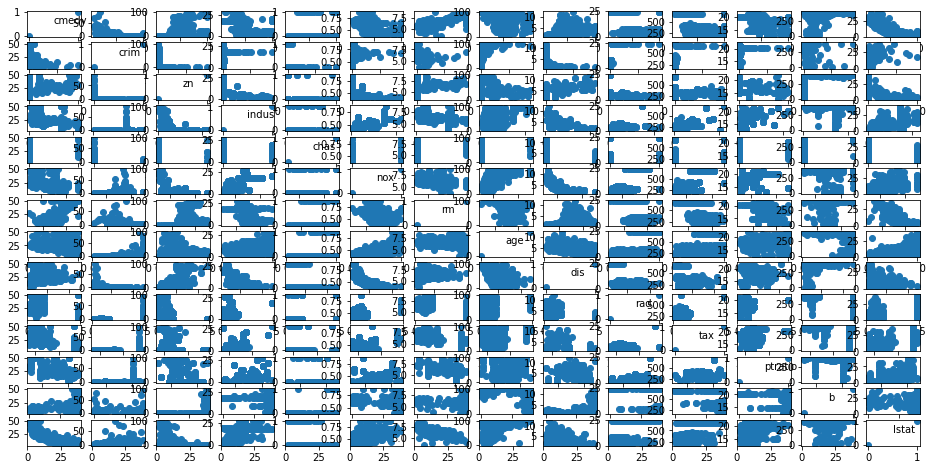

In [69]:
df = pd.read_csv("BostonHousing2.csv")
wn0 = df.columns
wn = wn0[5:]
f = plt.figure(figsize=(16,8))
k = 0
for i in range(len(wn)):
    
    for j in range(len(wn)):
        k += 1
        if i != j:
            f.add_subplot(len(wn), len(wn), k)
            plt.scatter(df[wn[i]], df[wn[j]])
            
        else:
            f.add_subplot(len(wn), len(wn), k)
            plt.scatter([0,1], [0,1])
            plt.text(.5, .5, wn[i])


In [70]:
y = np.array(df[wn[0]])[:, np.newaxis]
X = np.array(df[wn[1:]])

In [71]:
mod = sm.OLS(y, X)
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.960
Model:                            OLS   Adj. R-squared (uncentered):              0.959
Method:                 Least Squares   F-statistic:                              906.3
Date:                Mon, 02 Nov 2020   Prob (F-statistic):                        0.00
Time:                        18:36:50   Log-Likelihood:                         -1519.5
No. Observations:                 506   AIC:                                      3065.
Df Residuals:                     493   BIC:                                      3120.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [72]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=False)
regr = model.fit(X, y)
print(regr.coef_)

[[-9.11218348e-02  5.00126673e-02 -1.30708588e-03  2.85858964e+00
  -2.88024218e+00  5.90258783e+00 -7.36751413e-03 -9.95959986e-01
   1.69186398e-01 -9.77330608e-03 -3.64702252e-01  1.48089321e-02
  -4.22468608e-01]]


In [73]:
res = y - regr.predict(X)
res.shape = res.shape[0]

((array([-2.99573567e+00, -2.71411028e+00, -2.55577619e+00, -2.44351800e+00,
         -2.35556494e+00, -2.28276382e+00, -2.22036495e+00, -2.16557440e+00,
         -2.11660431e+00, -2.07223893e+00, -2.03161265e+00, -1.99408648e+00,
         -1.95917475e+00, -1.92649942e+00, -1.89576017e+00, -1.86671438e+00,
         -1.83916307e+00, -1.81294098e+00, -1.78790928e+00, -1.76395019e+00,
         -1.74096288e+00, -1.71886034e+00, -1.69756695e+00, -1.67701655e+00,
         -1.65715093e+00, -1.63791855e+00, -1.61927361e+00, -1.60117517e+00,
         -1.58358651e+00, -1.56647453e+00, -1.54980933e+00, -1.53356377e+00,
         -1.51771316e+00, -1.50223493e+00, -1.48710847e+00, -1.47231481e+00,
         -1.45783653e+00, -1.44365756e+00, -1.42976302e+00, -1.41613915e+00,
         -1.40277318e+00, -1.38965322e+00, -1.37676820e+00, -1.36410778e+00,
         -1.35166231e+00, -1.33942275e+00, -1.32738062e+00, -1.31552796e+00,
         -1.30385728e+00, -1.29236155e+00, -1.28103411e+00, -1.26986869e+00,

d:\code\python\机器学习\venv\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 25311 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\code\python\机器学习\venv\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 21512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\code\python\机器学习\venv\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\code\python\机器学习\venv\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 25311 missing from current font.
  font.set_text(s, 0, flags=flags)
d:\code\python\机器学习\venv\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 21512 missing from current font.
  font.set_text(s, 0, flags=flags)
d:\code\python\机器学习\venv\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 20540 missing from curre

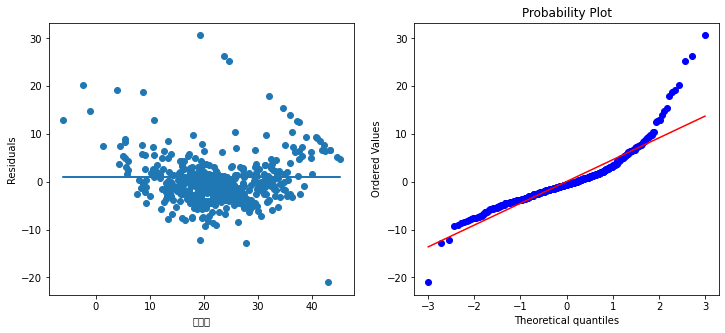

In [74]:
f = plt.figure(figsize=(12, 5))
f.add_subplot(121)
plt.scatter(regr.predict(X), res)
plt.plot(regr.predict(X), np.ones(len(y)))
plt.xlabel("拟合值")
plt.ylabel("Residuals")
f.add_subplot(122)
stats.probplot(res, dist="norm", plot=pylab)

In [75]:
u = pd.read_csv("BostonHousing2.csv")
un0 = u.columns
un = un0[5:]
y = np.array(u[un[0]])[:,np.newaxis]
X = np.array(u[un[1:]])

In [76]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import cross_val_predict
import graphviz

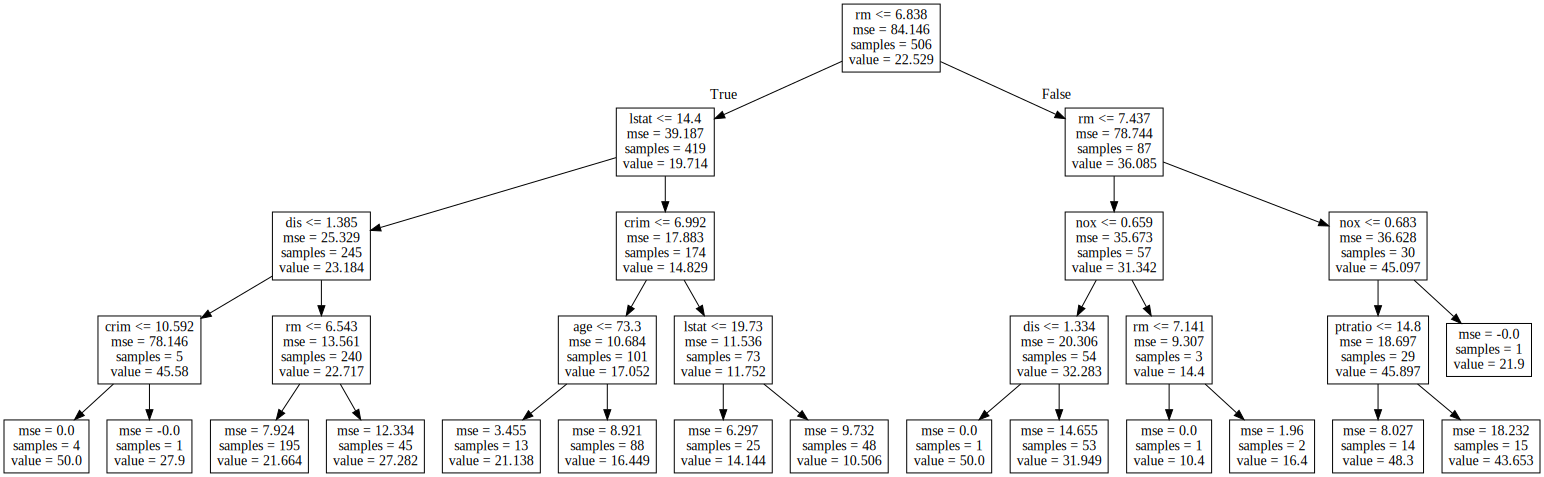

In [77]:
model = DecisionTreeRegressor(max_depth=4, random_state=1010)
regr = model.fit(X, y)
dot_data = tree.export_graphviz(regr, feature_names=un[1:], out_file=None)
graph = graphviz.Source(dot_data)
graph.render("Bostibpy0")
graph

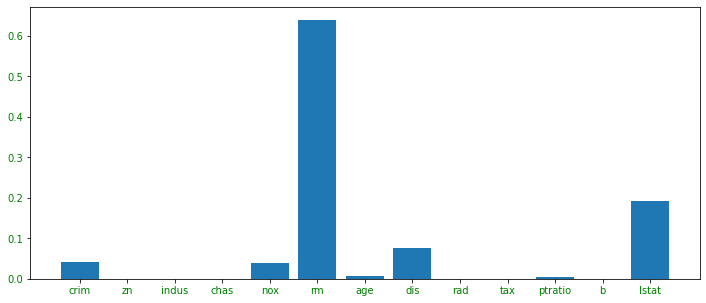

In [78]:
plt.figure(figsize=(12,5))
f.add_subplot(111)
height = regr.feature_importances_
bars = un[1:]
y_pos = np.arange(len(bars))
plt.bar(y_pos, height)
plt.xticks(y_pos, bars, color='green')
plt.yticks(color='green')
plt.show()

In [79]:
regr.score(X, y)  # 计算R得分

0.8891132415208693

In [80]:
"""
bagging回归

"""
from sklearn.ensemble import BaggingRegressor
model = BaggingRegressor(n_estimators=100, oob_score=True, random_state=1010)
model.fit(X, y)
print("Score: {}".format(model.score(X, y)))

d:\code\python\机器学习\venv\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Score: 0.9837509114492172


In [81]:
model.oob_score_

0.8799026541198653

In [82]:
"""
随机森林

"""
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
model = RandomForestRegressor(oob_score=True, random_state=1010)
model.fit(X, y)
print("Variable importance : {}".format(model.feature_importances_))
print("Score: {}".format(model.score(X, y)))
print("Score: {}".format(model.oob_score_))  # 交叉验证

d:\code\python\机器学习\venv\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Variable importance : [0.03746584 0.00095936 0.00605508 0.00072423 0.02309799 0.41671569
 0.01139272 0.06739611 0.00276362 0.01271641 0.01589155 0.01182867
 0.39299272]
Score: 0.9839627964921527
Score: 0.8815194510252822


d:\code\python\机器学习\venv\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


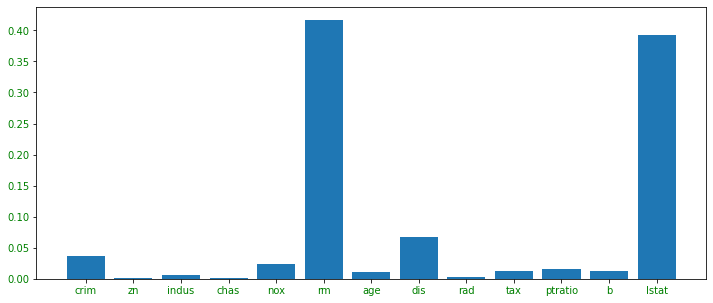

In [83]:
plt.figure(figsize=(12,5))
f.add_subplot(111)
height = model.feature_importances_
bars = un[1:]
y_pos = np.arange(len(bars))
plt.bar(y_pos, height)
plt.xticks(y_pos, bars, color='green')
plt.yticks(color='green')
plt.show()


In [84]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso, Lars, LassoLars, LinearRegression
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [86]:
names = ["N-Neighbors", "Lasso Lars", "Lasso", "Linear Lars", "Decision Tree", "Random Forest",
         "AdaBoost", "bagging", "SVR"]

regressors = [KNeighborsRegressor(),
              LassoLars(), Lars(), Lasso(), LinearRegression(),
              DecisionTreeRegressor(),
              RandomForestRegressor(n_estimators=500, oob_score=True),
              AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), n_estimators=300),
              BaggingRegressor(),
              SVR(C=1.0, epsilon=0.2)]

def FCV(x, y, regr, cv=10, seed=1010):
    np.random.seed(seed)
    ind = np.arange(y.size)
    np.random.shuffle(ind)
    X_folds = np.array_split(x[ind], cv)
    y_folds = np.array_split(y[ind], cv)
    X2 = np.empty((0, X.shape[1]), float)
    y2 = np.empty((0, y.shape[0]), float)
    yp = np.empty((0, y.shape[0]), float)
    for k in range(cv):
        X_train = list(X_folds)
        X_test = X_train.pop(k)
        X_train = np.concatenate(X_train)

        y_train = list(y_folds)
        y_test = y_train.pop(k)
        y_train = np.concatenate(y_train)

        regr.fit(X_train, y_train.ravel())
        y2 = np.append(y2, y_test)
        X2 = np.append(X2, X_test)
        yp = np.append(yp, regr.predict(X_test))

    nums = np.sum(pow(y2-yp, 2) / np.sum(pow(y2-np.mean(y2), 2)))
    r2 = 1- nums
    return np.array([nums, r2])

results = np.empty((0,2), float)
for regr in regressors:
    tt = np.array(FCV(X, y, regr, 10))
    tt.shape = (1, 2)
    results = np.append(results, tt, 0)

d:\code\python\机器学习\venv\lib\site-packages\ipykernel_launcher.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  after removing the cwd from sys.path.


[Text(-2.0, 0, 'N-Neighbors'),
 Text(0.0, 0, 'Lasso Lars'),
 Text(2.0, 0, 'Lasso'),
 Text(4.0, 0, 'Linear Lars'),
 Text(6.0, 0, 'Decision Tree'),
 Text(8.0, 0, 'Random Forest'),
 Text(10.0, 0, 'AdaBoost')]

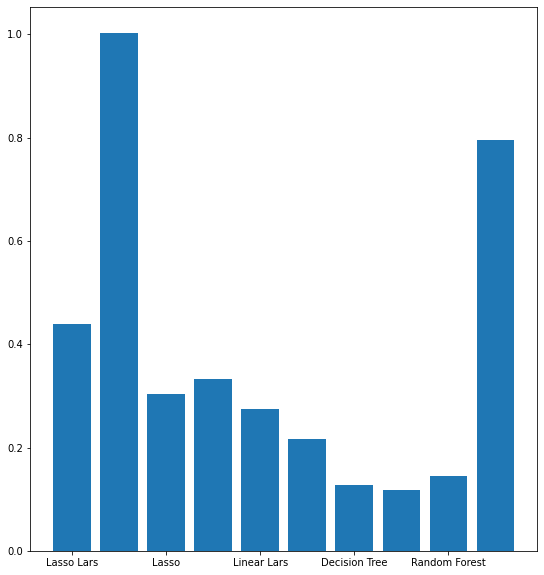

In [87]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(121)
ax.bar(np.arange(np.array(results).shape[0]), np.array(results)[:,0])
ax.set_xticklabels(names)

In [3]:
a = [1, 4, 6, 1, 3, 8, 1, 2, 9, 0]
a = pd.Series(a)
pd.cut(a.sort_values(ascending=False), 4)

8       (6.75, 9.0]
5       (6.75, 9.0]
2       (4.5, 6.75]
1       (2.25, 4.5]
4       (2.25, 4.5]
7    (-0.009, 2.25]
6    (-0.009, 2.25]
3    (-0.009, 2.25]
0    (-0.009, 2.25]
9    (-0.009, 2.25]
dtype: category
Categories (4, interval[float64]): [(-0.009, 2.25] < (2.25, 4.5] < (4.5, 6.75] < (6.75, 9.0]]

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
import pylab
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("BostonHousing2.csv")
df

,town,tract,lon,lat,medv,cmedv,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,Nahant,2011,-70.9550,42.2550,24.0,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,Swampscott,2021,-70.9500,42.2875,21.6,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,Swampscott,2022,-70.9360,42.2830,34.7,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,Marblehead,2031,-70.9280,42.2930,33.4,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,Marblehead,2032,-70.9220,42.2980,36.2,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,Winthrop,1801,-70.9860,42.2312,22.4,22.4,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,Winthrop,1802,-70.9910,42.2275,20.6,20.6,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,Winthrop,1803,-70.9948,42.2260,23.9,23.9,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,Winthrop,1804,-70.9875,42.2240,22.0,22.0,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [5]:
df["cont"]=1

In [8]:
wn0 = df.columns
wn = wn0[5:]
y = np.array(df[wn[0]])[:, np.newaxis]
X = np.array(df[wn[1:]])

In [10]:
y[0:5]

array([[24. ],
       [21.6],
       [34.7],
       [33.4],
       [36.2]])

In [11]:
X[0:5]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00, 1.0000e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00, 1.0000e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00, 1.0000e+00],
       [3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.9980e+00, 4.5800e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9463e+02, 2.9400e+00, 1.0000e+00],
       [6.9050e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        7.1470e+00, 5.4200e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9690e+02, 5.3300e+00, 1.0000e+00]])

In [14]:
# 若VIF>5，则存在严重多重共线性
from statsmodels.stats.outliers_influence import variance_inflation_factor
variance_inflation_factor(X,1)

2.298758178749441

当前的vif值为2.298758178749441， 小于五，认为不存在多重共线性
# jupyter 使用快捷键
* Add Code Cell Above `Alt + Shift + A`
* Add Code Cell Below `Alt + Shift + B`